In [71]:
%load_ext autoreload
%autoreload 2

import numpy as np
import matplotlib.pyplot as plt
import rescomp
import rescomp.esn_new_update_code as esn_new
import rescomp.plotting as plotting
import rescomp.statistical_tests as st

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


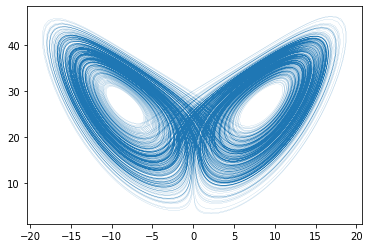

In [3]:
# Lorenz parameters:
dt_L = 0.01
lyap_L = 0.934
starting_point_L = np.array([0, 1, 0])
# starting_point_L = np.array([-14.03020521, -20.88693127, 25.53545])

# lorenz iterator:
def data_creation_function_L(time_steps, dt, starting_point):
    return rescomp.simulations.simulate_trajectory("lorenz", dt, time_steps, starting_point)

def f_L(x):
    return data_creation_function_L(2, dt_L, x)[-1]

# test lorenz iterator:
disc_steps = 1000
time_steps = 50000

time_series_all = np.zeros((time_steps+disc_steps, 3))
time_series_all[0, :] = starting_point_L

for i in range(1, time_steps+disc_steps):
    x_last = time_series_all[i - 1, :]
    time_series_all[i, :] = f_L(x_last)

time_series_L = time_series_all[disc_steps:, :]

plt.plot(time_series_L[:, 0], time_series_L[:, 2], linewidth=0.1)

In [169]:
time_series = time_series_L
time_series = rescomp.utilities.normalize_timeseries(time_series)
time_series.shape

(50000, 3)

# Extended Test:

In [206]:
t_train_disc = 0
t_train_sync = 200
t_train = 3000
t_pred_disc = 500
t_pred_sync = 200
t_pred = 2000
nr_of_time_intervals = 1

x_train, x_pred_list, sim_data = st.data_simulation(time_series, t_train_disc, t_train_sync, t_train,
                                                         t_pred_disc, t_pred_sync, t_pred, nr_of_time_intervals=nr_of_time_intervals,
                                                         sim_data_return = True)

train_disc_steps:  0
train_sync_steps:  200
train_steps:  3000
pred_disc_steps:  500
pred_sync_steps:  200
pred_steps:  2000
total_time_steps:  5900
................................
x_train shape:  (3200, 3)
x_pred_list shape : (1, 2200, 3)
sim_data shape : (50000, 3)


In [243]:
# Same parameters for all:
x_dim = 3
r_dim = 100
r_to_r_gen_opt = "bias"
# r_to_r_gen_opt = lambda r, x: np.hstack((r, 1))
act_fct_opt = "sigmoid"
bias_scale = 0.0 # None
leak_factor = 0.0
w_in_opt = "random_dense_gaussian"
w_in_scale = 1.0
default_res_state = None
reg_param = 1e-8
bias_seed = 1
w_in_seed = 1

## Test Normal ESN:

In [244]:
n_rad = 0.1
n_avg_deg = 6.0
n_type_opt = "erdos_renyi"

esn_normal = esn_new.ESN_normal()
esn_normal.build(x_dim, r_dim=r_dim, n_rad=n_rad, n_avg_deg=n_avg_deg, n_type_opt=n_type_opt, r_to_r_gen_opt=r_to_r_gen_opt, act_fct_opt=act_fct_opt, bias_scale=bias_scale, leak_factor=leak_factor, w_in_opt=w_in_opt, w_in_scale=w_in_scale, default_res_state=default_res_state, reg_param=reg_param, bias_seed=bias_seed, w_in_seed=w_in_seed)

In [245]:
esn_normal.train(x_train, sync_steps=t_train_sync, save_r=True, save_r_internal=True, save_res_inp=True)

normal_train_int = (esn_normal.get_r(), esn_normal.get_r_internal(), esn_normal.get_res_inp())

In [246]:
normal_pred, normal_true = esn_normal.predict(x_pred_list[0], sync_steps=t_pred_sync, save_r=True, save_r_internal=True, save_res_inp=True)

normal_pred_int = (esn_normal.get_r(), esn_normal.get_r_internal(), esn_normal.get_res_inp())

In [247]:
# Plotting:
i = 0
title = "normal"
data = {"True": normal_true[:, i], "Predicted": normal_pred[:, i]}
fig = plotting.plot_multiple_1d_time_series(data, title=title)
fig.show()

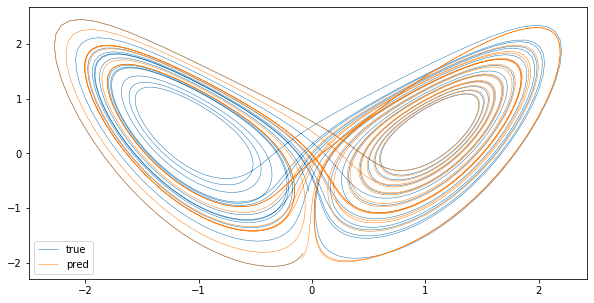

In [248]:
plt.figure(figsize=(10, 5))
plt.plot(normal_true[:, 0], normal_true[:, 2], linewidth=0.51, label="true")
plt.plot(normal_pred[:, 0], normal_pred[:, 2], linewidth=0.51, label="pred")
plt.legend()

Text(0.5, 1.0, 'activation fct input')

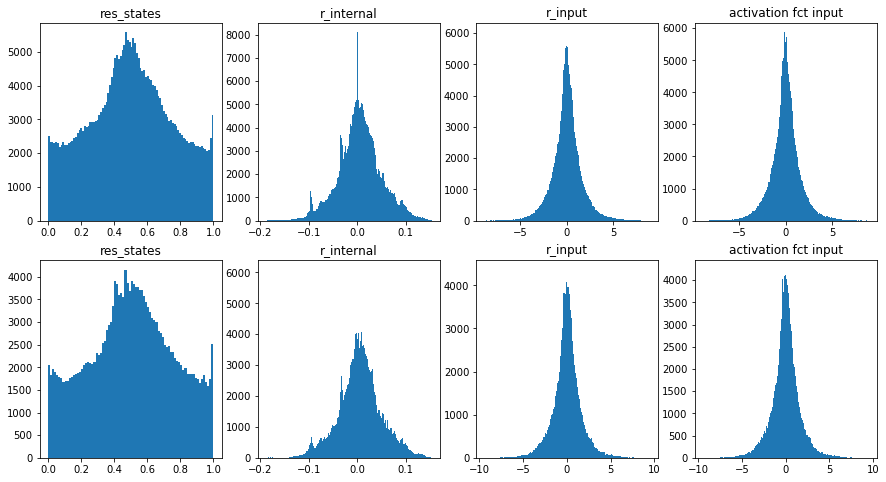

In [249]:
plt.figure(figsize=(15, 8))
plt.subplot(241)
plt.hist(normal_train_int[0].flatten(), bins="auto")
plt.title("res_states")

plt.subplot(242)
plt.hist(normal_train_int[1].flatten(), bins="auto")
plt.title("r_internal")

plt.subplot(243)
plt.hist(normal_train_int[2].flatten(), bins="auto")
plt.title("r_input")

plt.subplot(244)
both = normal_train_int[1] + normal_train_int[2]
plt.hist(both.flatten(), bins="auto")
plt.title("activation fct input")

plt.subplot(245)
plt.hist(normal_pred_int[0].flatten(), bins="auto")
plt.title("res_states")

plt.subplot(246)
plt.hist(normal_pred_int[1].flatten(), bins="auto")
plt.title("r_internal")

plt.subplot(247)
plt.hist(normal_pred_int[2].flatten(), bins="auto")
plt.title("r_input")

plt.subplot(248)
both = normal_pred_int[1] + normal_pred_int[2]
plt.hist(both.flatten(), bins="auto")
plt.title("activation fct input")

## Test DynSys ESN:

In [282]:
dyn_sys_opt = "KS"
dyn_sys_dt = 0.2
scale_factor = 0.5
dyn_sys_other_params = (60, )

esn_dynsys = esn_new.ESN_dynsys()
esn_dynsys.build(x_dim, r_dim=r_dim, dyn_sys_opt=dyn_sys_opt, dyn_sys_dt=dyn_sys_dt, scale_factor=scale_factor, dyn_sys_other_params=dyn_sys_other_params, r_to_r_gen_opt=r_to_r_gen_opt, act_fct_opt=act_fct_opt, bias_scale=bias_scale, leak_factor=leak_factor, w_in_opt=w_in_opt, w_in_scale=w_in_scale, default_res_state=default_res_state, reg_param=reg_param, bias_seed=bias_seed, w_in_seed=w_in_seed)

In [283]:
esn_dynsys.train(x_train, sync_steps=t_train_sync, save_r=True, save_r_internal=True, save_res_inp=True)

dynsys_train_int = (esn_dynsys.get_r(), esn_dynsys.get_r_internal(), esn_dynsys.get_res_inp())

In [284]:
dynsys_pred, dynsys_true = esn_dynsys.predict(x_pred_list[0], sync_steps=t_pred_sync, save_r=True, save_r_internal=True, save_res_inp=True)

dynsys_pred_int = (esn_dynsys.get_r(), esn_dynsys.get_r_internal(), esn_dynsys.get_res_inp())

In [285]:
# Plotting:
i = 0
title = "dynsys"
data = {"True": dynsys_true[:, i], "Predicted": dynsys_pred[:, i]}
fig = plotting.plot_multiple_1d_time_series(data, title=title)
fig.show()

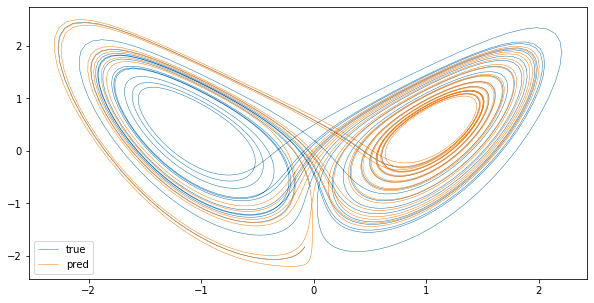

In [286]:
plt.figure(figsize=(10, 5))
plt.plot(dynsys_true[:, 0], dynsys_true[:, 2], linewidth=0.51, label="true")
plt.plot(dynsys_pred[:, 0], dynsys_pred[:, 2], linewidth=0.51, label="pred")
plt.legend()

Text(0.5, 1.0, 'activation fct input')

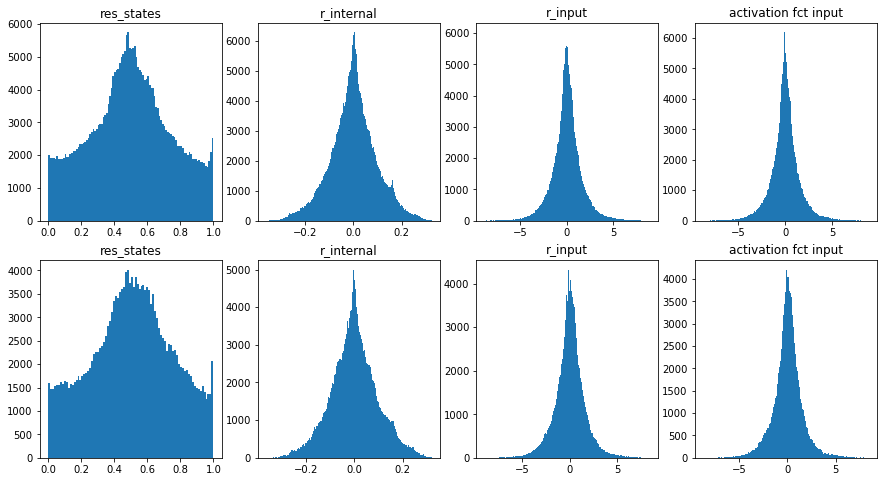

In [287]:
plt.figure(figsize=(15, 8))
plt.subplot(241)
plt.hist(dynsys_train_int[0].flatten(), bins="auto")
plt.title("res_states")

plt.subplot(242)
plt.hist(dynsys_train_int[1].flatten(), bins="auto")
plt.title("r_internal")

plt.subplot(243)
plt.hist(dynsys_train_int[2].flatten(), bins="auto")
plt.title("r_input")

plt.subplot(244)
both = dynsys_train_int[1] + dynsys_train_int[2]
plt.hist(both.flatten(), bins="auto")
plt.title("activation fct input")

plt.subplot(245)
plt.hist(dynsys_pred_int[0].flatten(), bins="auto")
plt.title("res_states")

plt.subplot(246)
plt.hist(dynsys_pred_int[1].flatten(), bins="auto")
plt.title("r_internal")

plt.subplot(247)
plt.hist(dynsys_pred_int[2].flatten(), bins="auto")
plt.title("r_input")

plt.subplot(248)
both = dynsys_pred_int[1] + dynsys_pred_int[2]
plt.hist(both.flatten(), bins="auto")
plt.title("activation fct input")

--------

In [47]:
esn = esn_new._ResCompCore()

In [48]:
esn.temp_init_ESN()

In [76]:
train = time_series[:5000]
esn.train(train, sync_steps=0, save_r=True, save_r_internal=True, save_res_inp=True)
internals_train = (esn.get_r(), esn.get_r_internal(), esn.get_res_inp())

In [83]:
predict = time_series[5000-1: 10000]
pred, true = esn.predict(predict, sync_steps=3000, reset_res_state=True, save_r=True, save_r_internal=True, save_res_inp=True)
internals_pred = (esn.get_r(), esn.get_r_internal(), esn.get_res_inp())

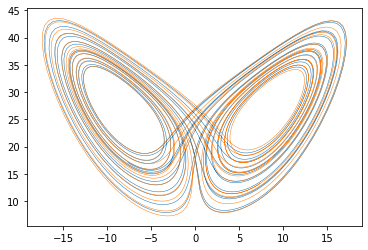

In [84]:
plt.plot(pred[:, 0], pred[:, 2], linewidth=0.51)
plt.plot(true[:, 0], true[:, 2], linewidth=0.51)

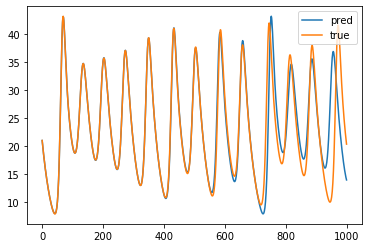

In [85]:
i = 2
plt.plot(pred[:1000, i], label="pred")
plt.plot(true[:1000, i], label="true")
plt.legend()

In [86]:
t_train_disc = 0
t_train_sync = 100
t_train = 5000
t_pred_disc = 0
t_pred_sync = 100
t_pred = 1000
nr_of_time_intervals = 1

x_train, x_pred_list, sim_data = st.data_simulation(time_series, t_train_disc, t_train_sync, t_train,
                                                         t_pred_disc, t_pred_sync, t_pred, nr_of_time_intervals=nr_of_time_intervals,
                                                         sim_data_return = True)

train_disc_steps:  0
train_sync_steps:  100
train_steps:  5000
pred_disc_steps:  0
pred_sync_steps:  100
pred_steps:  1000
total_time_steps:  6200
................................
x_train shape:  (5100, 3)
x_pred_list shape : (1, 1100, 3)
sim_data shape : (50000, 3)


In [74]:
x_train[-1]

array([-4.33849083, -8.09172427,  9.82962937])

In [75]:
x_pred_list[0][0]

array([-4.33849083, -8.09172427,  9.82962937])

(array([1., 0., 1., ..., 0., 0., 1.]),
 array([-1.45056883, -1.44785533, -1.44514183, ...,  2.15839031,
         2.16110381,  2.16381732]),
 <a list of 1332 Patch objects>)

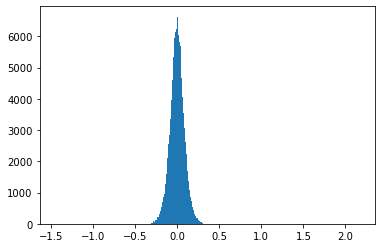

In [46]:
plt.hist(internals_pred[2].flatten(), bins="auto")

In [96]:
input = time_series_L
esn._drive(time_series, save_out=True, save_r_internal=True, save_res_inp=True)

In [97]:
esn._saved_out[0]

array([-2.62408137,  0.97393661,  0.88376837])

In [98]:
input[0]

array([-5.91656551, -5.52331221, 24.5724456 ])

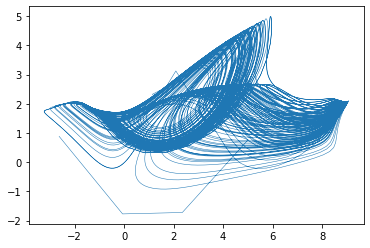

In [99]:
to_plot = esn._saved_out
plt.plot(to_plot[:, 0], to_plot[:, 2], linewidth=0.51)


(array([2.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00, 2.0000e+00,
        1.0000e+00, 2.0000e+00, 3.0000e+00, 0.0000e+00, 1.0000e+00,
        4.0000e+00, 3.0000e+00, 7.0000e+00, 5.0000e+00, 1.0000e+01,
        1.2000e+01, 1.0000e+01, 1.0000e+01, 1.6000e+01, 1.5000e+01,
        1.2000e+01, 2.2000e+01, 1.8000e+01, 1.2000e+01, 2.8000e+01,
        3.0000e+01, 2.2000e+01, 3.5000e+01, 3.2000e+01, 3.2000e+01,
        3.4000e+01, 3.5000e+01, 3.8000e+01, 4.8000e+01, 5.0000e+01,
        5.5000e+01, 5.2000e+01, 5.1000e+01, 6.8000e+01, 7.5000e+01,
        7.6000e+01, 6.0000e+01, 5.6000e+01, 9.0000e+01, 8.3000e+01,
        9.7000e+01, 9.0000e+01, 1.0800e+02, 8.5000e+01, 1.0800e+02,
        1.1900e+02, 1.1700e+02, 1.1600e+02, 1.4500e+02, 1.3000e+02,
        1.2900e+02, 1.3900e+02, 1.5900e+02, 1.3600e+02, 1.4600e+02,
        1.5100e+02, 1.7900e+02, 1.9400e+02, 1.5700e+02, 2.0700e+02,
        1.6700e+02, 2.0500e+02, 2.0300e+02, 1.9000e+02, 2.1800e+02,
        2.4000e+02, 2.7200e+02, 2.2900e+02, 2.59

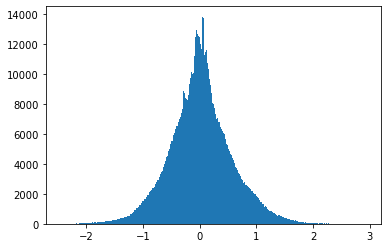

In [100]:
plt.hist(esn._saved_res_inp.flatten(), bins="auto")


(array([2.0000e+00, 2.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00,
        2.0000e+00, 3.0000e+00, 1.0000e+00, 3.0000e+00, 1.0000e+00,
        2.0000e+00, 1.0000e+00, 6.0000e+00, 2.2000e+01, 5.9000e+01,
        1.0200e+02, 1.4000e+02, 2.2500e+02, 2.5200e+02, 2.8100e+02,
        6.8400e+02, 5.4100e+02, 4.6600e+02, 4.4900e+02, 4.4700e+02,
        4.7200e+02, 5.0800e+02, 5.2400e+02, 9.1500e+02, 9.0700e+02,
        8.2800e+02, 8.4300e+02, 7.9000e+02, 8.0300e+02, 8.5600e+02,
        8.7200e+02, 8.8100e+02, 9.1700e+02, 9.8200e+02, 9.8300e+02,
        9.6100e+02, 9.4000e+02, 9.7000e+02, 9.4500e+02, 8.6100e+02,
        8.6300e+02, 8.4100e+02, 8.1200e+02, 8.0600e+02, 8.3600e+02,
        8.3100e+02, 8.8700e+02, 8.8900e+02, 1.1210e+03, 1.3720e+03,
        1.5550e+03, 1.6160e+03, 1.7170e+03, 1.7540e+03, 1.8200e+03,
        2.1120e+03, 2.5500e+03, 2.4210e+03, 2.3350e+03, 2.3140e+03,
        2.3120e+03, 2.5560e+03, 2.6660e+03, 2.5890e+03, 2.5760e+03,
        3.1000e+03, 3.2290e+03, 3.1320e+03, 3.35

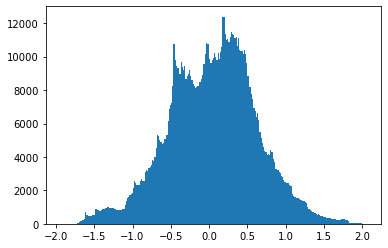

In [101]:
plt.hist(esn._saved_r_internal.flatten(), bins="auto")


In [102]:
to_plot = esn._loop(10000)


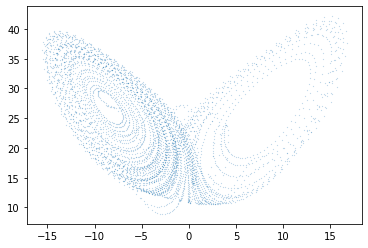

In [141]:
plt.scatter(to_plot[:, 0], to_plot[:, 2], s=0.01)

In [164]:
sync = time_series[:1000]
x_train = time_series[1000: 5000]
y_train = time_series[1001: 5001]
pred = time_series[5000:]

esn = esn_new._ESNCore()
esn.temp_init_ESN()

esn.drive(sync)
esn.train_synced(x_train, y_train, save_r=True, save_out=True)

In [160]:
r = esn.get_r()

In [161]:
r.shape

(4000, 100)

In [165]:
# plotting.show_reservoir_states(r)

In [170]:
to_plot2 = esn.get_out()

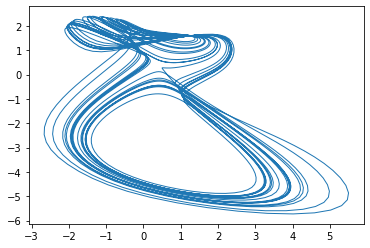

In [172]:
plt.plot(to_plot2[1000:, 0], to_plot2[1000:, 2], linewidth=1)
# plt.plot(pred[1000:, 0], pred[1000:, 2], linewidth=1)

In [175]:
to_plot = esn.loop(5000, save_r=True)

In [178]:
# plotting.show_reservoir_states(esn.get_r())

In [176]:
to_plot[0]

array([  8.35421275,  -6.04080211, -43.04138178])

In [149]:
pred[0]

array([ 2.06750938,  3.45708811, 15.55844735])

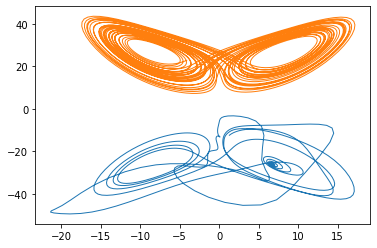

In [150]:
plt.plot(to_plot[1000:, 0], to_plot[1000:, 2], linewidth=1)
plt.plot(pred[1000:, 0], pred[1000:, 2], linewidth=1)

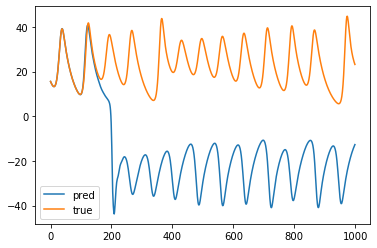

In [152]:
i = 2
plt.plot(to_plot[:1000, i], label="pred")
plt.plot(pred[:1000, i], label="true")
plt.legend()

In [182]:
esn_simple = esn_new.ESN_simple()


[autoreload of rescomp.esn_new_update_code failed: Traceback (most recent call last):
  File "C:\Users\Dennis\anaconda3\envs\rc_env_np16p6\lib\site-packages\IPython\extensions\autoreload.py", line 245, in check
    superreload(m, reload, self.old_objects)
  File "C:\Users\Dennis\anaconda3\envs\rc_env_np16p6\lib\site-packages\IPython\extensions\autoreload.py", line 394, in superreload
    module = reload(module)
  File "C:\Users\Dennis\anaconda3\envs\rc_env_np16p6\lib\imp.py", line 314, in reload
    return importlib.reload(module)
  File "C:\Users\Dennis\anaconda3\envs\rc_env_np16p6\lib\importlib\__init__.py", line 169, in reload
    _bootstrap._exec(spec, module)
  File "<frozen importlib._bootstrap>", line 630, in _exec
  File "<frozen importlib._bootstrap_external>", line 728, in exec_module
  File "<frozen importlib._bootstrap>", line 219, in _call_with_frames_removed
  File "C:\Users\Dennis\Documents\GitHub\rescomp\rescomp\esn_new_update_code.py", line 204, in <module>
    class E

In [187]:
esn_simple.build(3, h=1)

TypeError: 'h' is an invalid keyword argument for print()

In [189]:
a = lambda x: (x)

In [190]:
print(a)


<function <lambda> at 0x0000025E1E748828>


In [191]:
import inspect
inspect.getsource(a)


'a = lambda x: (x)\n'

In [100]:
esn_normal = esn_new.ESN()
esn_normal.build(3, r_to_r_gen_opt="bias")

In [101]:
train = time_series[:5000]
esn_normal.train(train, sync_steps=0, save_r=True, save_r_internal=True, save_res_inp=True)
internals_train = (esn_normal.get_r(), esn_normal.get_r_internal(), esn_normal.get_res_inp())

In [102]:
predict = time_series[5000-1: 10000]
pred, true = esn.predict(predict, sync_steps=3000, reset_res_state=True, save_r=True, save_r_internal=True, save_res_inp=True)
internals_pred = (esn.get_r(), esn.get_r_internal(), esn.get_res_inp())


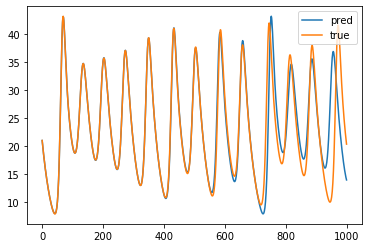

In [103]:
i = 2
plt.plot(pred[:1000, i], label="pred")
plt.plot(true[:1000, i], label="true")
plt.legend()


In [117]:
esn_normal = esn_new.ESN_normal()

np.random.seed(1)
esn_normal.build(3, r_to_r_gen_opt="bias", w_in_seed=3)
esn_normal._w_in

[ 1.62434536 -0.61175641]


array([[ 0.        ,  0.        , -0.85855024],
       [-0.75734284,  0.        ,  0.        ],
       [ 0.        ,  0.78589391,  0.        ],
       ...,
       [ 0.        ,  0.        ,  0.00713314],
       [ 0.93923274,  0.        ,  0.        ],
       [ 0.        ,  0.31964285,  0.        ]])

In [115]:
esn_normal.build(3, r_to_r_gen_opt="bias", w_in_seed=2)
esn_normal._w_in

array([[-0.62983584,  0.        ,  0.        ],
       [ 0.09932496,  0.        ,  0.        ],
       [ 0.        ,  0.        , -0.03050181],
       ...,
       [ 0.        ,  0.6416353 ,  0.        ],
       [ 0.37528071,  0.        ,  0.        ],
       [-0.26244832,  0.        ,  0.        ]])

In [116]:
print(np.random.randn(2))


[ 1.06531826 -0.33324345]
